# Modeling and simulation with partial differential equations
### Linnéuniversitetet
Student: Fill in name of all members and student codes

## Instructions

In this computer lab we revise models for population dynamics, steady state and conduction of heat, transport and diffusion of pollutants, and propagation of waves. As discussed in the lectures a powerful tool for modeling in science and engineering consists of describing the observed phenomena by employing differential equations. 
Solutions to differential equations contain information of the state and evolution of the system it models.
This allows analysts to predict the behavior of the system and to make decisions based on the obtained solution.
Although solutions cannot always be evaluated with simple formulas, most of the times we can choose numerical methods for obtaining sufficiently good approximations to a solution of a differential equation.

The advantage of using exact formulas is that it allows to get a deep look into the model itself, since its explicit form is known. 
Exact solutions can also be used to asses the quality of approximation methods by means of comparison. In this notebook we present simple examples where exact formulas can be obtained. We then get familiarized with each model by solving the proposed excersises given in this notebook. The student is expected to present solutions to all excercises in the notebook and motivate answers by showing derivations in detail and submitting Python scripts.
 
You are required to submit solutions to all the exercises presented in this notebook.
**The deadline for hand in your solutions is Friday September 15th**.

## Computer lab 2: Modeling with differential equations

## The Poisson equation:

We consider first the one dimensional Poisson equation
$$ -\frac{d}{dx}\left(k \frac{du}{dx}\right)=f,\,\,x\in (0,1),\,\,u(0)=0,\,\,u(1)=0,$$
where $k$ and $f$ are given functions. Here, $k$ is a positive function that characterizes the properties of the system and $f$ describes the sources or forcing.

### Exercise 1: 
We consider the case $k=f=1$, and search for the solution of the ODE $u''=-1$ for $x\in (0,1)$.

**1)** Show that the general solution of the problem is $$u(x)=-\frac{x^2}{2}+Ax+B,$$
with $A,B$ constants to be determined. Hint: Integrate the ODE twice. Remember to add generic constants of integration.

**2)** Use the boundary conditions $u(0)=0$ and $u(1)=0$ to find the constants $A$ and $B$ that satisfy the boundary value problem (BVP).

**3)** Verify that the solution you find satisfies the BVP. This is
$$u''=-1 \quad\text{satisfying}\quad u(0)=0\,\, \text{and}\,\, u(1)=0.$$
Hint: the solution to the BVP is $$u(x)=\frac{x(1-x)}{2}.$$

**4)** Now repeat the process and find the solution to the new BVP
$$v''=-1 \quad\text{satisfying}\quad v(0)=0\,\, \text{and}\,\, v'(1)=0.$$
What are the resulting values for the new constants $A,B$?

**5)** Can you find a unique solution to the following BVP
$$w''=-1 \quad\text{satisfying}\quad w'(0)=0\,\, \text{and}\,\, w'(1)=0.$$
Are there unique values for the constants $A,B$? Motivate your answer. 

**6)** In individual figures plot $u$ and $v$. Can you plot $w$? 

Solution ...

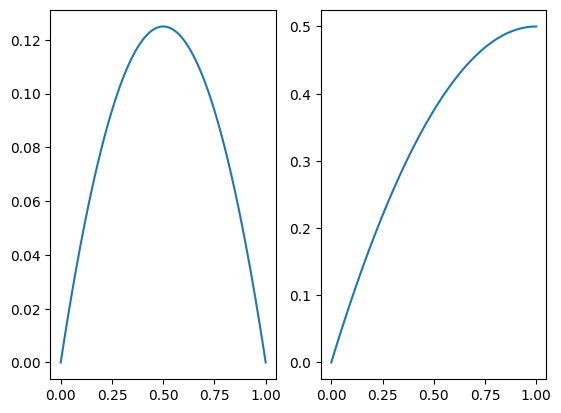

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
x = np.linspace(0,1,100)
y = (x*(1-x))/2
plt.plot(x,y)
plt.subplot(1,2,2)
y = x*(1-x/2)
plt.plot(x,y)
# omega kan inte lösas då A tar flera värden

### Exercise 2:
Now, we deal with the Poisson equation with variable coefficients.
Particularly, we are interested in finding an exact solution when $k(x)$ is a piecewise function. 

For the next task we let $$f(x)=1,\quad k(x)=\left\{
\begin{array}{cc}
1, & 0\leq x \leq 1/2 \\ 
\sigma, & 1/2 < x \leq 1
\end{array}\right.$$

In this case, the BVP 
$$ -\frac{d}{dx}\left(k \frac{du}{dx}\right)=1,\,\,x\in (0,1),\,\,u(0)=0,\,\,u(1)=0,$$
exhibits some difficulties when we try to find a solution the satisfies the ODE in each point of the domain.
Particularly, we are not allowed to take derivatives of a discontinuous function.

We can, however, rewritte the problem as a **transmission problem** where we exclude the problematic point $x=1/2$ and treat it as a transmission point.

The idea is to look for solutions that are continuous but are not smooth (later in the course we refer to them as weak solutions). For example, it is natural to expect that the exact solution is also a piecewise function
$$u(x)=\left\{
\begin{array}{cc}
u_1(x), & 0\leq x < 1/2 \\ 
u_2(x), & 1/2 < x \leq 1
\end{array}\right.$$

Then, in each subdomain we have ODEs with constant coefficients. The problem in each subdomain is now written as
$$
\begin{array}{cc}
-u_1''=1, & 0\leq x < 1/2 \\ 
-\sigma u_2''=1, & 1/2 < x \leq 1
\end{array}.$$

Similarly as in **Exercise 1**, we can easily find that
$u_1(x)=Ax-\frac{x^2}{2}$ and $u_2(x)=\frac{1}{\sigma}\left(Bx+\frac{1}{2}-B-\frac{x^2}{2}\right)\,$
for constants $A,B$ to be determined.

Show that the solution $u(x)$ satisfies the ODE. 

**1)** This is, that 
$-u_1''=1,$ for $0\leq x < 1/2$ and b) $-\sigma u_2''=1,$ for $1/2< x \leq 1$.

**2)** Show that the boundary conditions are satisfied: This is that $u(0)=u_1(0)=0$ and $u(1)=u_2(1)=0$.

**Transmission conditions**:

We require that $u(x)$ is continuous in the domain, and particularly at $x=1/2$. This condition results in $$u_1(1/2)=u_2(1/2).$$ 
A second requirement ensures that the outer derivative in the ODE exists. For this we impose that $k(1/2)u'(1/2)$ is continuous. This results in the condition
$$u'_1(1/2)=\sigma\,u'_2(1/2).$$

We find the constants $A,B$ from our piecewise solution by using the transmission conditions at $x=1/2$.

**3)** Use the two transmission conditions given above and find the constants $A,B$. 

Hint: the constants are
$$A=\frac{\sigma+3}{4(\sigma+1)},\,\,B=A.$$

Solution ...

### Exercise 3:

Implement a plotting routine below that plots $u(x)$ from **Exercise 2** for a given $\sigma$.

**1)** Plot your solution for $\sigma=1,2,5,10$. 

**2)** Describe what happens to $u(x)$ when you increase $\sigma$.

**3)** Choose $\sigma=5$ and $u'(x)$ and $k(x)u'(x)$. Are these functions continuous?

Solution ...

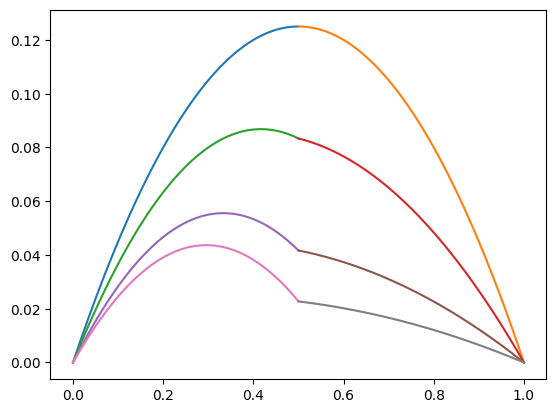

In [3]:
# 1)
sigma = [1,2,5,10]
j = 0
for i in sigma:
    x = np.linspace(0,0.5,1000)
    A = (sigma[j] + 3)/(4*(sigma[j] + 1))
    y = A*x-(x**2)/2
    plt.plot(x,y)
    x = np.linspace(0.5,1,1000)
    y = (1/sigma[j])*(A*x+0.5-A-(x**2)/2)
    plt.plot(x,y)
    j += 1
# 2) som vi kan se blir amplituden på u1(x) lägre ju högre sigma vi använder och u2(x) får en svagare negativ lutning

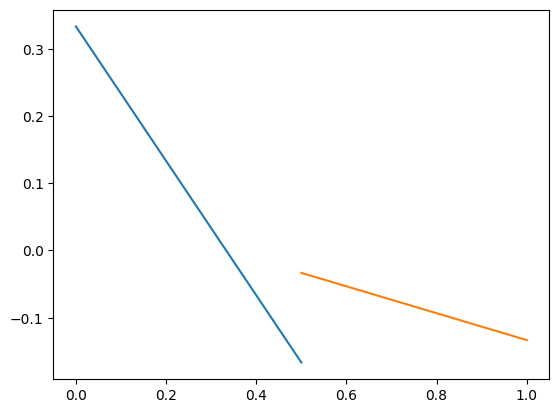

In [4]:
# 3) u'(x) ej kont men k(x)*u'(x) kont
sigma = 5
# u'(x)
x = np.linspace(0,0.5,1000)
A = (sigma + 3)/(4*(sigma + 1))
y = A-x
plt.plot(x,y)
x = np.linspace(0.5,1,1000)
y = (1/sigma)*(A-x)
plt.plot(x,y)

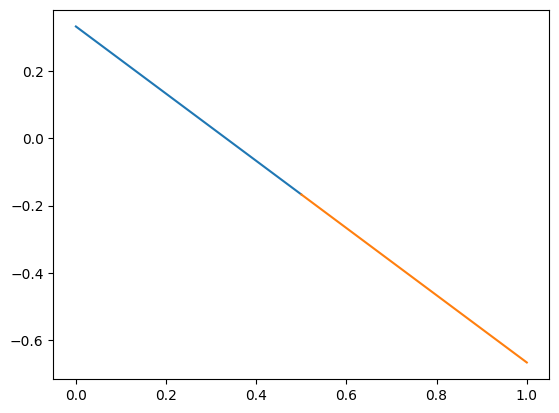

In [5]:
# k(x)*u'(x)
x = np.linspace(0,0.5,1000)
y = A-x
plt.plot(x,y)
x = np.linspace(0.5,1,1000)
y = (A-x)
plt.plot(x,y)

### Exercise 4:
Show that $u(x)$ obtained in **Exercise 2** reduces to the solution given in **Excercise 1**: $\quad u(x)=\frac{x(1-x)}{2},$

when we use a homogeneous constant function $k(x)=1$ everywhere in the domain. 

Hint: use $\sigma=1$, check the value of the constants $A,B$ and write down $u_1$, $u_2$ and compare them with $u(x)$ obtained in **Exercise 1**.


Solution ...

## Population dynamics:
Consider a model for population dynamics of a population sample $y$ that evolves in time $t$.
For this, we use a simple model based on the ordinary differential equation
$$\frac{dy}{dt}=k y (A-y),\,\,t>0,\,\,y(0)=y_0,$$
where $k$ is a growth constant and $A$ is a constant that limits the size of the population.
Both $k$ and $A$ are positive constants.

Let the exact solution to this ODE be written as
$$y(t)=\frac{A y_0}{y_0+(A-y_0)e^{-A k t}}.$$

### Exercise 5:

**1)** Verify that the model satisfies the initial data: This is that
at time $t=0$, we obtain $y(0)=y_0$. 

**2)** Verify that the model satisfies that $y(t)\rightarrow A$ as $t \rightarrow \infty$. 

**3)** Describe for what choice of $y_0$ the population (a) grows, (b) decays  and (c) does not vary in time. Motivate your answer by discussing the rate of change in the population and by using different values of the parameter $A$ in your ODE. 

Hint: Plot $y(t)$ by using $k=0.1,\,\,A=10$, $T=10$ for $0\leq t \leq T$. For your plots choose the cases: $y_0<A$, $y_0=A$ and $y_0 > A$.

**4)** Use separation of variables to derive a general solution to the ODE. 

a) First, try to write the ODE in the differential form $$f(y)\,dy=g(t)\,dt$$ by finding a suitable function $f(y)$ and using $g(t)=k$. 

b) Integrate and add only one generic constant. Use a table of integrals in this step.

c) Isolate $y$ on the left term of the equation such that it looks as: $\,\,y(t)=\ldots$

d) Use the initial condition $y(0)=y_0$ to find the solution $y(t)$ that satisfies the initial data.



Solution ...

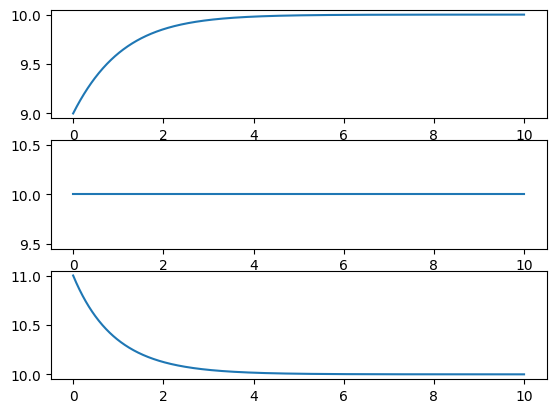

In [6]:
# 3) 9 grows 10 same 11 shrinks
A = 10
k = 0.1
T = 10
y0 = 11
t = np.linspace(0,T,1000)
j = 1
for i in range(9,12):
    y0 = i
    y = (A*y0)/(y0+(A-y0)*np.exp(-A*k*t))
    plt.subplot(3,1,j)
    plt.plot(t,y)
    j += 1

### Exercise 6:

**1)** We will employ a simple numerical scheme in order to get an approximation $y_h$ of the solution.
Namely, the Finite Difference method and the Forward Euler scheme.

We look for a set of discrete numerical approximations to $y(t_j)$ and $y'(t_j)$ in grid points $0<t_1<t_2,\ldots,t_N$ in a "time-stepping" manner. 

For this, consider $t\in [0,T]$ and set up a grid or partition consisting of $N$ divisions of the total period $T$.
We introduce $N+1$ nodes $\{t_j\}_{j=0}^N$, $t_j=jh$, with $h=T/N$ defining our grid. Let $y_j$ denote the approximation $y_j\approx y(t_j)$ at each node in the grid. An explicit numerical scheme for our problem results in decoupled equations that allows to compute $y_{j+1}$ once $y_j$ is known. We start our time-stepping scheme by using the initial condition $y_0$ and computing $y_1$. Once $y_1$ is found our numerical scheme allows us to compute $y_2$ and we can repeat the process for computing $y_3,y_4,\ldots,y_N$.

**2)** Derive an explicit numerical scheme for the population model based on the following approximations
$$\frac{dy_{j+1}}{dt}\approx k y_j (A-y_j),$$
and the first order forward difference formula
$$\frac{dy_{j+1}}{dt}\approx \frac{y_{j+1}-y_{j}}{h}.$$

**3)** For the numerical computations use $k=0.1,\,\,A=10.0,\,\,T=10.0$ and compute approximations corresponding to $N=5,10,20,50,100$. Consider the two different initial populations (a) $y_0=A/2$ and (b) $y_0=A$, (c) $y_0=1.5 A$. Generate plots for comparing your numerical solutions and exact solutions. 

**4)** How would you measure the error between the exact and the numerical solution? Do you trust your numerical solution? Motivate your answer by comparing numerical solutions obtained with different $N$.


In [37]:
# Finite difference
k = 0.1
A = 10
T = 10
N = 5
j = 0
h = T/N
t = np.linspace(j,T,N+1)
s = np.zeros(len(t))
s[0] = A/2
#y0 = A/2
for i in t:
    tj = (i)*h
    # Forward Euler
    s[i+1] = s[i] + h*(A*s[i])/(s[i]+(A-s[i])*np.exp(-A*k*t))
    #y0 = y0 + h*(A*y0)/(y0+(A-y0)*np.exp(-A*k*tj))
    #y0 = 5 + h*y0
    #y0 = y0 + h*(A*y0)/(y0+(A-y0)*np.exp(-A*k*t))
    #y0 = (A*y0)/(y0+(A-y0)*np.exp(-A*k*tj))
    #y0 = tj*k*y0*(A-y0)
    #y1 = (A*y0)/(y0+(A-y0)*np.exp(-A*k*tj))
    #y0 = y1-y0z
    plt.scatter(tj,s[i])
    print(y0)
y0 = 1.5*A
t = np.linspace(0,T,1000)
y = (A*y0)/(y0+(A-y0)*np.exp(-A*k*t))
plt.plot(t,y)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Modeling transport
Now we want to explore models that vary in space and time. Since our model depends on several independent variables we obtain a partial differential equation. Consider a model for transport:
$$\frac{\partial u}{\partial t}+c \frac{\partial u}{\partial x}=f,\,\, u(x,0)=u_0(x)$$
for the constant speed of propagation $c$. The source term $f$ is the spatial concentration input into the system.

### Exercise 7:

For the tasks below we set $f=0$. This means that after the initial concentration is added to the system at $t=0$, new concentration is not added to the system at $t>0$.

**1)** Show that $u(t,x)=\sin (x-ct)$ solves the PDE when $u_0=\sin(x)$.

**2)** Show that $u(t,x)=f(x-ct)$ solves the PDE when $u_0=f(x)$.

**3)** Let $c=1$ and $u_0=e^{-x^2/4}$. Write down the solution to the transport equation. Plot the solution for $-2<x<2$ and $t=0,1,2$.

Solution ...

In [8]:
x = np.linspace(-2,2,100)
u = np.exp((-x**2)/4)

array([0.36787944, 0.38289132, 0.39819064, 0.4137634 , 0.42959439,
       0.44566718, 0.46196408, 0.47846622, 0.4951535 , 0.51200469,
       0.5289974 , 0.54610814, 0.56331234, 0.58058444, 0.5978979 ,
       0.61522529, 0.63253831, 0.64980792, 0.66700437, 0.68409729,
       0.70105577, 0.71784846, 0.73444367, 0.75080943, 0.76691364,
       0.7827241 , 0.79820872, 0.81333551, 0.82807279, 0.84238922,
       0.85625398, 0.8696368 , 0.88250816, 0.89483932, 0.90660247,
       0.91777082, 0.92831871, 0.9382217 , 0.94745666, 0.95600187,
       0.96383711, 0.97094371, 0.97730466, 0.98290467, 0.98773022,
       0.99176959, 0.99501299, 0.99745249, 0.99908215, 0.99989797,
       0.99989797, 0.99908215, 0.99745249, 0.99501299, 0.99176959,
       0.98773022, 0.98290467, 0.97730466, 0.97094371, 0.96383711,
       0.95600187, 0.94745666, 0.9382217 , 0.92831871, 0.91777082,
       0.90660247, 0.89483932, 0.88250816, 0.8696368 , 0.85625398,
       0.84238922, 0.82807279, 0.81333551, 0.79820872, 0.78272

## Modeling dispersion/diffusion
Consider a model that assumes that certain population has the tendency of dispersing away from crowded areas. Let $d$ be a dispersion constant describing how fast the dispersion takes place in time.
Consider the following model
$$\frac{\partial u}{\partial t}=d\frac{\partial^2 u}{\partial x^2},\,\, x\in \mathbb R,\,\, t>0.$$

For the next tasks, assume that at initial time there is a high concentration located in a small region of space (point) and we are interested in observing the evolution of the population acording to the last dispersion model.

### Exercise 8:

**1)** Verify by direct differentiation that $$u(x,t)=\frac{1}{\sqrt{4\pi dt}}e^{-\frac{x^2}{4 d t}}$$
satisfies the PDE. In your derivation assume $t>0$.

**2)** Observe the behavior of the sample in time. Plot the solution at $t=0.1,1,10.$

Solution ...

## Advection diffusion

We are interested in modelling *advection difussion* of a chemical with concentration $u$ that is being transported within a fluid with speed $c$. Additionally, we assume that the pollutant is subject to diffusion. In the model it is assumed that the system has reached a steady state $du/dt=0$. Consider the following ODE
$$
-d u''+c u'=f,\,\,x\in(0,1)\,\,\text{and}\,\,u(0)=u(1)=0,
$$
where $d>0$ is the diffusion constant and the speed of advection is $c$.
The forcing term $f$ accounts for the amount of chemical that enters the system and is a function of $x$.

Since the equation has second order derivatives, it makes sense to have two boundary conditions. We have seen examples of these for the Poisson equation. However, the nature of the differential equation changes drastically for $d \to 0$. Formally, the limit equation when $d\rightarrow 0$
is given by the **first order** problem
$$
c u'(x) = f(x) \quad \text{for } x \in (0,1)
$$
and it is natural that only *one* boundary condition should
be required in the limit case (see **Exercise 9.1**). 

It turns out that when $d \to 0$, it is natural to impose a Dirichlet boundary condition $u(0) = u_0$ only at the "inflow point" $x=0$. Thus at the "outflow point" the condition $u(1) = u_1$ becomes "redundant". We will study later the performance of approximation schemes when we gradually approach this limit case.

### Exercise 9:

1) Find a general solution to the ODE $\,\,u'(x) = 1$. How many boundary conditions can we impose simultaneously?

2) Compute the forcing function $f(x)$ such that
\begin{align}
u(x) = x - 
  \dfrac{e^{(x-1)/d} - e^{-1/d}}
  {1 - e^{-1/d}}
\end{align}
is an exact solution for the advection diffusion equation with $c = 1$ and arbitrary $d$.

Hint: By direct computation on the exact solution find $u'$ and $u''$ and use them in the ODE. Then, you solve for $f$, which should not look too complicated. 

3) Plot your solution for $d=1,0.25,0.1,0.01$.

Solution ...

## Modeling wave propagation
Consider the following PDE
$$\frac{\partial^2 u}{\partial t^2}-c^2 \frac{\partial^2 u}{\partial x^2}=0,\,\, u(x,0)=u_0(x),\,\, \left. \frac{\partial u}{\partial t}\right|_{t=0}=0,\,\,x\in \mathbb R$$
for the constant speed of propagation $c$.

### Exercise 10:

**1)** Show that (a) $u_1(x,t)=f(x-ct)$ and (b) $u_2(x,t)=f(x+ct)$ are solutions of the PDE. 

**2)** Since the model involves a linear PDE, we can use the linear superposition 
$$u(x,t)=A_1 u_1(x,t) + A_2 u_2(x,t)$$
to write a general solution. Find the constants $A_1, A_2$ of the general solution $u(x,t)$ when $u(x,0)=f(x),\,\, \left. \frac{\partial u}{\partial t}\right|_{t=0}=0$.

**3)** Let $c=1$ and $f(y)=e^{-y^2/4}$. (a) Write down the solution to the wave equation. (b)
Plot the solution for $-10<x<10$ and $t=0,1,2,3,4$.

**4)** Assume that the wave can be written in the form $u(x,t)=v(x)\cos(\omega t)$ for constant $\omega$. Show that under this assumption we obtain the so-called Helmholtz equation
$$\frac{d^2 v}{dx^2}+\left(\frac{\omega}{c}\right)^2 v =0,$$
which is a time independent ODE. 

**5)** Show that $v_1(x)=\sin(\tfrac{\omega}{c}x)$ and $v_2(x)=\cos(\tfrac{\omega}{c}x)$ are solutions to the one dimensional Helmholtz equation.


Solution ...